<a href="https://colab.research.google.com/github/VeatArt/ArtisticStylePhotoTransfer/blob/main/LoopedArtisticStyleTransfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import glob
!pip install pycuda # install cuda
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 26.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 5.9 MB/s 
     |████████████████████████████████| 74 kB 4.1 MB/s 
  Created wheel for pycuda: filename=pycuda-2022.2.2-cp38-cp38-linux_x86_64.whl size=646530 sha256=111bd5876c15fa29dfd00a8f7f584bc6e87c5a8ea0362e5870118df8d75180ab
  Stored in directory: /root/.cache/pip/wheels/7b/41/0d/7cecb04af969d283ebe4a69579a8b2baec0d010a1ac4159f7e
  Created wheel for pytools: filename=pytools-2022.1.14-py2.py3-none-any.whl size=69870 sha256=bc7b7ddd1e48692647e9a86d8878599fc385c770ec7a27140a81ebeead9b28de
  Stored in directory: /root/.cache/pip/wheels/cb/fc/a9/1e7e56fe02d7f58eaff555f22e79d4fc2d817012291254bae2
Successfully built pycuda pytools


In [ ]:
#!git clone https://github.com/LouieYang/deep-photo-styletransfer-tf.git

fatal: destination path 'deep-photo-styletransfer-tf' already exists and is not an empty directory.


In [ ]:
#def tensor_to_image(tensor):
 # tensor = tensor*255
 # tensor = np.array(tensor, dtype=np.uint8)
 # if np.ndim(tensor)>3:
   # assert tensor.shape[0] == 1
   # tensor = tensor[0]
 # return PIL.Image.fromarray(tensor)

In [ ]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0
Tue Dec 27 03:42:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   7067MiB / 15109MiB |      0%      Default |
|                               |      

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
#hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-inceptionv3/2')

In [ ]:
# Definition der Pfade auf der Bilder gespeichert sind 
content_images = glob.glob('/content/drive/MyDrive/Gebauede1_Resized/*.png')
content_image_path = ('/content/drive/MyDrive/Gebauede1_Resized/')
style_image = load_image('/content/drive/MyDrive/Gebauede1_Resized/StyleImages/style14.jpg')
target_size = (1200, 1200,)
style_strength = 0.5



In [ ]:
num_iterations = len(content_images)
print('Number of content images:', len(content_images))

Number of content images: 50


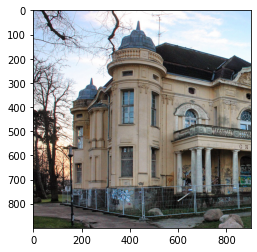

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

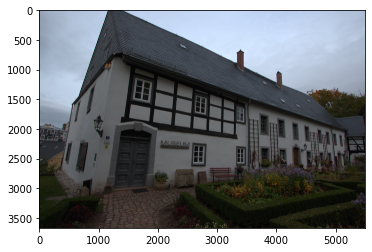

In [ ]:

  plt.imshow(np.squeeze(content_image))
  plt.show()

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# Iteratives Vorprozessierungen und Style-Transfer Durchlauf der Content-Bilder in angegebenen Ordner, sowie Speicherung in file_path mit definierten file_name in Referenz zum content-image zum automatisierten zuweisen in Reality-Capture Software


#for i, content_image_path in enumerate(content_images):
for content_image_path in content_images:
  content_image = load_image(content_image_path)
  #content_image = tf.io.read_file(content_image_path)
  #content_image = tf.image.decode_png(content_image)
 # content_image = tf.image.convert_image_dtype(content_image, tf.float32)
  #content_image = tf.image.resize(content_image, target_size)
  
  #start_time = time.time()
  resized_content_image = tf.image.resize(content_image, target_size, method='nearest', preserve_aspect_ratio=True, antialias=True)
  #start_time = time.time()
  stylized_image = hub_model(tf.constant(resized_content_image), tf.constant(style_image))[0]
  #elapsed_time = time.time() - start_time
  stylized_image_np = np.squeeze(stylized_image) * 255
  stylized_image_np = cv2.cvtColor(stylized_image_np, cv2.COLOR_BGR2RGB)
  file_name = os.path.basename(content_image_path)
  file_name = os.path.splitext(file_name)[0] + '.png.texture.png'
  file_path = os.path.join('/content/drive/MyDrive/Gebauede1_Resized/Output', file_name)
  cv2.imwrite(file_path, stylized_image_np)
  #stylized_image.save('stylized_image_{}.png'.format(i+1))
  #tf.keras.backend.clear_session()

#print(f'Elapsed time: {elapsed_time:.2f} seconds')

In [ ]:
#cv2.imwrite(content_image, cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True